<a href="https://colab.research.google.com/github/gktjdwns/autonomous_curriculum/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageOps

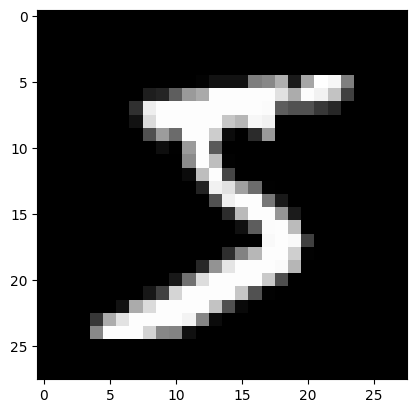

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

plt.imshow(train_images[0], cmap='gray')
plt.show()

print(train_images[0])

# 픽셀를 0~1사이의 값으로 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)


1875/1875 [==============================] - 70s 37ms/step - loss: 0.1472 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0478 - accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0349 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0216 - accuracy: 0.9928


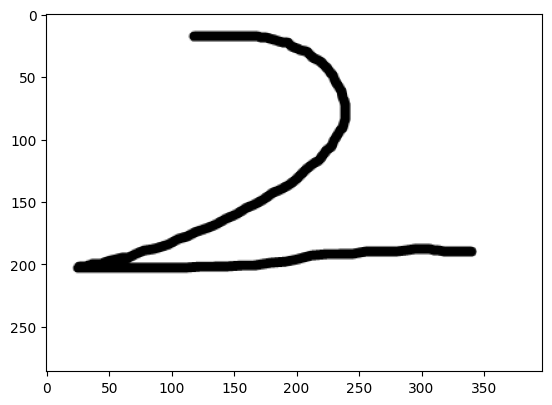

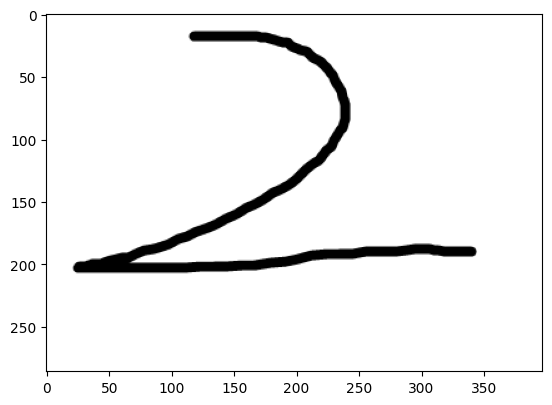

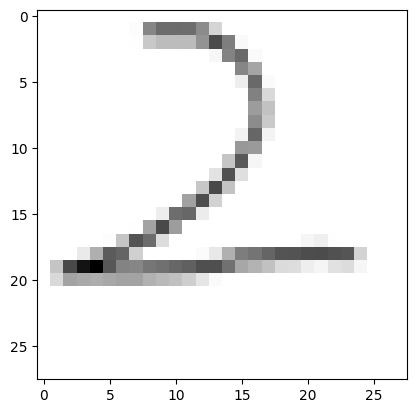

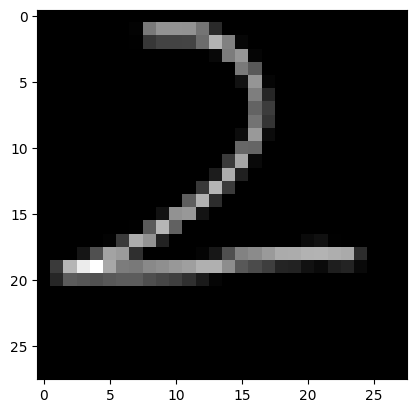

1/1 [==============================] - 0s 33ms/step
2


In [15]:
img = Image.open('/content/drive/MyDrive/num.png')
plt.imshow(img, cmap='gray')
plt.show()

#이미지를 grayscale로 변환
img = img.convert('L')

plt.imshow(img, cmap='gray')
plt.show()

# 이미지를 28*28사이즈로 축소
img = img.resize((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

# 색상 반전(흰색=>검은색,검은색=>흰색)
img = ImageOps.invert(img)

plt.imshow(img, cmap='gray')
plt.show()

# 이미지를 numpy배열로 변환
input_img = np.asarray(img).reshape(1, 28, 28, 1) / 255.0

# 모델에 입력
prediction = model.predict(input_img)
predicted_number = np.argmax(prediction)

print(predicted_number)
